# Сборный проект

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### План работы
1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ данных](#analysis)
4. [Портрет пользователя каждого региона](#portrait)
5. [Проверка гипотез](#hypothesis)
6. [Общий вывод](#conclusion)

## Открытие данных <a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6513,Batman: Vengeance,GC,2001.0,Adventure,0.20,0.05,0.00,0.01,70.0,5.8,T
12644,Archer Maclean Presents: Pool Paradise,PS2,2004.0,Sports,0.03,0.02,0.00,0.01,NaN,NaN,NaN
3028,Pro Pinball: Big Race USA,PS,1999.0,Simulation,0.37,0.25,0.00,0.04,69.0,tbd,E
9715,Puzzle Quest: Challenge of the Warlords,PS2,2007.0,Puzzle,0.06,0.05,0.00,0.02,78.0,7,E10+
14427,Jig-A-Pix: Wild World,DS,2009.0,Puzzle,0.03,0.00,0.00,0.00,NaN,tbd,E
893,Virtua Fighter 2,SAT,1995.0,Fighting,0.34,0.26,1.30,0.03,NaN,NaN,NaN
9662,Criticom,PS,1996.0,Fighting,0.07,0.05,0.00,0.01,NaN,NaN,NaN
13980,Taikou Risshiden V,PSP,2009.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
777,Your Shape featuring Jenny McCarthy,Wii,2009.0,Sports,1.49,0.46,0.00,0.18,62.0,5.2,E
15352,Rugby League Team Manager 2015,PC,2015.0,Action,0.00,0.02,0.00,0.00,NaN,tbd,NaN


### Вывод
Датасет состоит из 16715 строк.
Нужно привести к правильному типу столбец с годом выпуска и столбец с оценками пользователей, а также обратить внимание на пропущенные значения

## Подготовка данных <a id="preprocessing"></a>

Приведем названия столбцов к нижнему регистру.

In [4]:
games.columns = games.columns.str.lower()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Приведем столбец с годом релиза к целочисленному типу.
Посмотрим на значения столбца с оценками пользователей.

In [5]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обратим внимание на значение "tbd". Оно расшифровывается как "to be decided", то есть оно еще не определено. Поэтому заменим его на NaN.

In [6]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь мы можем поменять тип данных в этом столбце, ведь оценка это все же число, а не строка.

In [7]:
games['user_score'] = games['user_score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


С типом данных теперь все в порядке, но есть пропущенные значения. В столбцах с оценками критиков и пользователей и с возрастным рейтингом игры, мы не можем заменить пропуски на что-то адекватное, что не повлияло бы на анализ данных. Есть пропуски в столбце с годом выхода игры. Мы бы могли заменить некоторые пропуски на год выхода этой игры на другой платформе, но я считаю, что это не совсем корректно: есть примеры, когда игры на разных консолях выходили в разное время, а также, возможно, что у некоторых игр был ремастер с улучшенной графикой. Тем более этих пропусков не так много и на выводы они не повлияют. Поэтому, пропуски в этом столбце остаются. А вот пропуск в столбце с названием интересен.

In [8]:
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
games = games.drop(games.index[[659, 14244]]).reset_index(drop=True)

Удалим эти две строки.

In [10]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [11]:
games['rating'] = games['rating'].replace(np.nan, 'Unknown')

### Вывод
Данные приведены к должному виду, можно приступить к анализу.

## Исследовательской анализ данных <a id="analysis"></a>

Посмотрим, сколько игр выпускалось в разные годы

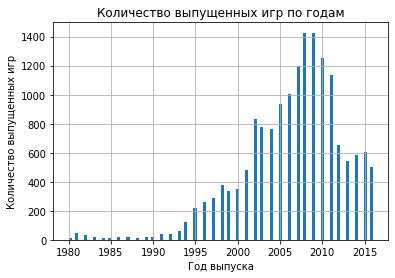

In [12]:
games['year_of_release'].plot(kind = 'hist', bins=100, grid = True)
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
_= plt.title('Количество выпущенных игр по годам')

В 90-е начался подъем игровой индустрии, который достиг своего пика в 2008. После этого стало выходить меньше игр. Возможно, это связано с появлением смартфонов и появлением первых мобильных игр. Но, чтобы сделать прогноз на 2017 год, нам не нужны данные за все эти годы.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

Text(0, 0.5, 'Количество продаж')

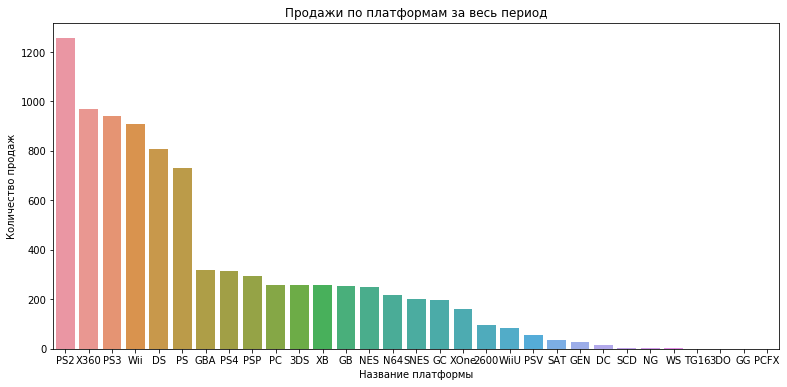

In [13]:
platform_sales = games.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').sort_values(by = 'all_sales', ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales.index, y=platform_sales['all_sales'])

plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Посмотрим на примере самых популярных консолей в истории, характерный срок жизни консоли.

In [14]:
def year_total_sale_for_platform(name, data):
    slice1 = data[data['platform'] == name]
    total = slice1.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total


In [15]:
top_6_consoles = platform_sales.head(6).reset_index().rename_axis(None, axis=1)
top_6_consoles

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


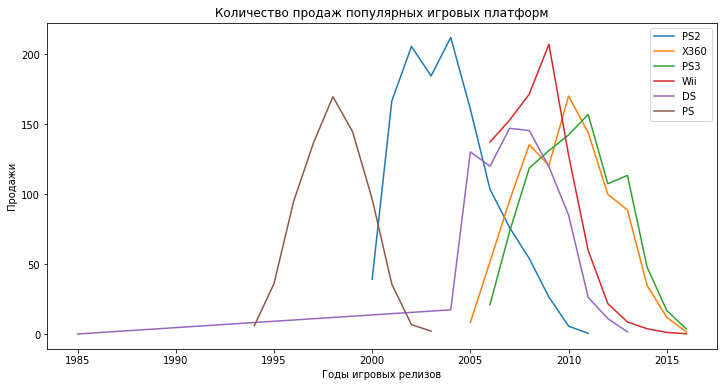

In [16]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')
top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for i in list(top_6_consoles['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,games)['all_sales'], label=i)
    plt.legend()


В среднем консоли живут 10 лет. Посмотрим, какие консоли из нашего датасета до сих пор "живут".

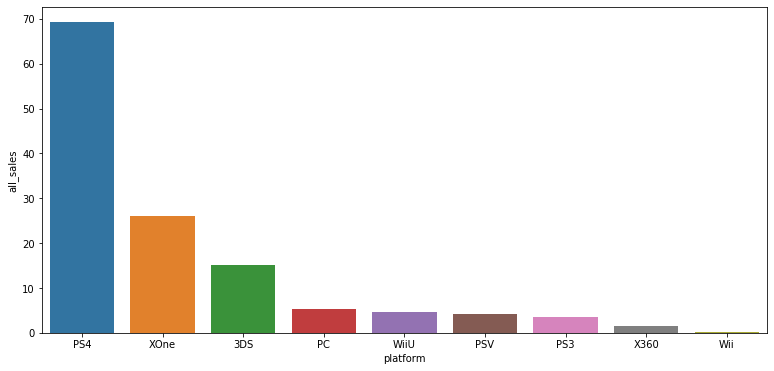

In [17]:
platform_sales_new = games[games['year_of_release'] >= 2016].pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum').sort_values(by = 'all_sales', ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales_new.index, y=platform_sales_new['all_sales'])

In [18]:
top_consoles_new = platform_sales_new.reset_index().rename_axis(None, axis=1)
top_consoles_new

,platform,all_sales
0,PS4,69.25
1,XOne,26.15
2,3DS,15.14
3,PC,5.25
4,WiiU,4.60
5,PSV,4.25
6,PS3,3.60
7,X360,1.52
8,Wii,0.18


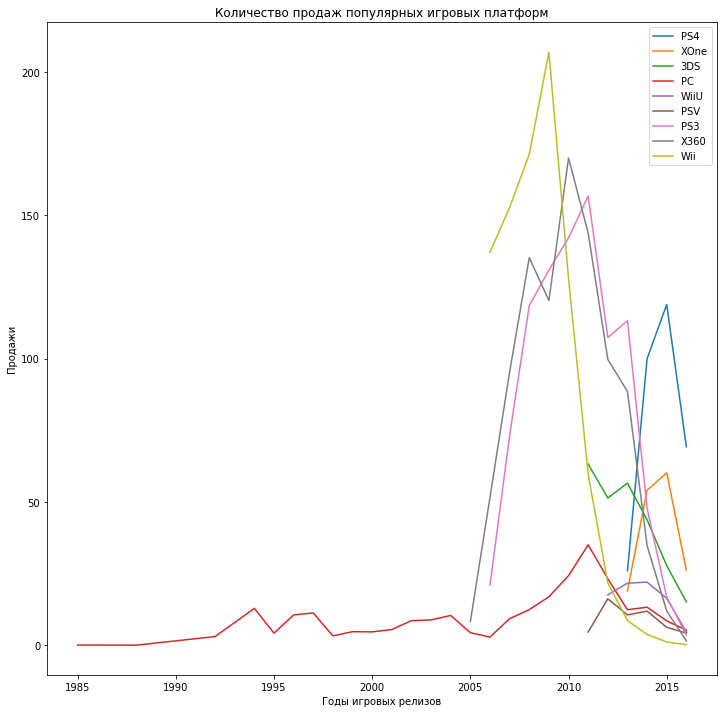

In [19]:
plt.figure(figsize=(12,12))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_consoles_new['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,games)['all_sales'], label=i)
    plt.legend()


Судя по графику, игры на новые консоли начали выпускать примерно в 2014 году. Как раз и возьмем этот год как начало отсчета актуального периода. Посмотрим, как распределены продажи по актуальным консолям по разным годам.

In [35]:
def graphic(actual_data):
    plt.figure(figsize=(12, 6))
    sns.barplot(data = actual_data, x='platform', y='all_sales')
    plt.title('Количество продаж популярных игровых платформ за год')
    plt.xlabel('Название платформы')
    plt.ylabel('Продажи')


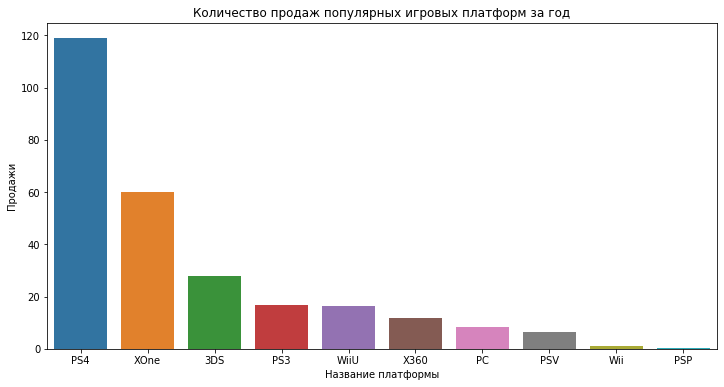

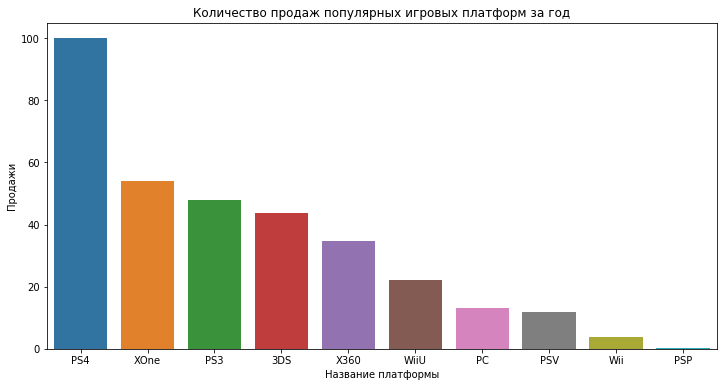

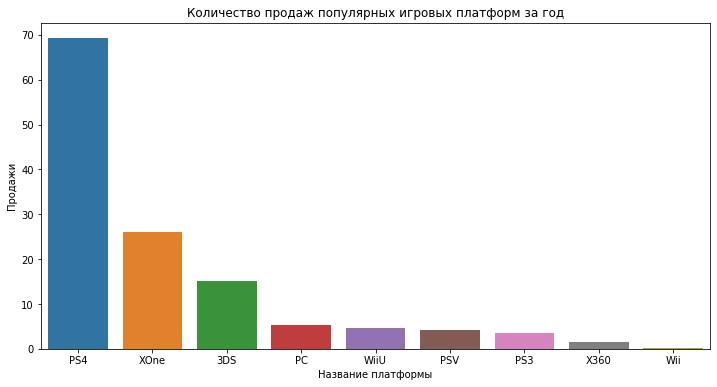

In [36]:
actual_data = games.query('year_of_release >= 2014')
list_of_years = actual_data['year_of_release'].unique()
for years in list_of_years:
    actual_platform = actual_data[actual_data['year_of_release'] == years].pivot_table(
        index=['platform'], 
        values='all_sales', 
        aggfunc='sum').reset_index().sort_values(by='all_sales', ascending=False)
    graphic(actual_platform)


Text(0, 0.5, 'Продажи')

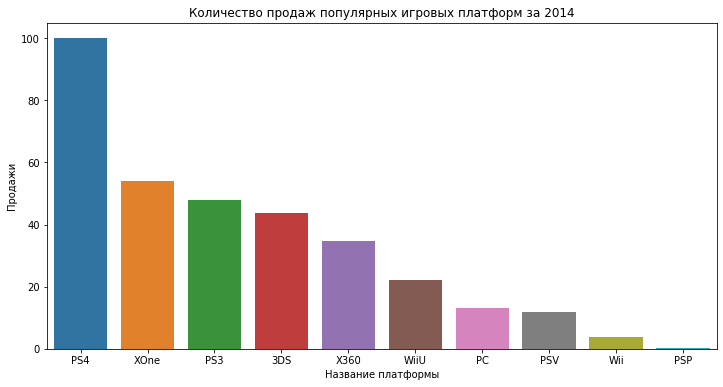

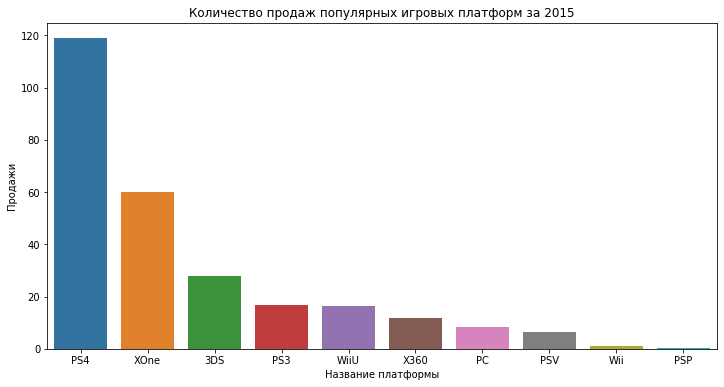

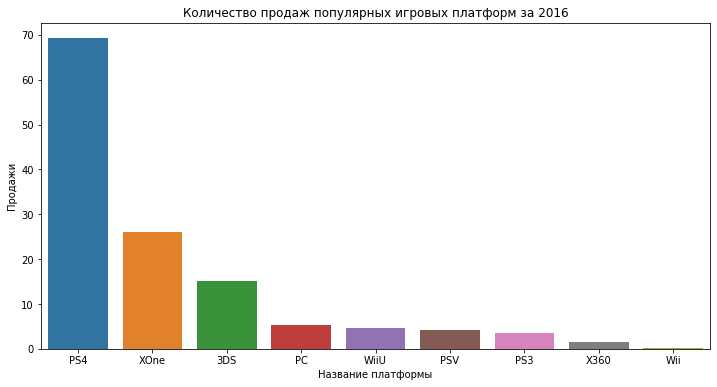

In [20]:
actual_data = games.query('year_of_release >= 2014')

actual_data_2014 = actual_data.query('year_of_release == 2014')
actual_data_2015 = actual_data.query('year_of_release == 2015')
actual_data_2016 = actual_data.query('year_of_release == 2016')
actual_platform_2014 = actual_data_2014.pivot_table(index=['platform'], values='all_sales', aggfunc='sum').reset_index().sort_values(by='all_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data = actual_platform_2014, x='platform', y='all_sales')
actual_platform_2015 = actual_data_2015.pivot_table(index=['platform'], values='all_sales', aggfunc='sum').reset_index().sort_values(by='all_sales', ascending=False)
plt.title('Количество продаж популярных игровых платформ за 2014')
plt.xlabel('Название платформы')
plt.ylabel('Продажи')

plt.figure(figsize=(12, 6))
sns.barplot(data = actual_platform_2015, x='platform', y='all_sales')
actual_platform_2016 = actual_data_2016.pivot_table(index=['platform'], values='all_sales', aggfunc='sum').reset_index().sort_values(by='all_sales', ascending=False)
plt.title('Количество продаж популярных игровых платформ за 2015')
plt.xlabel('Название платформы')
plt.ylabel('Продажи')

plt.figure(figsize=(12, 6))
sns.barplot(data = actual_platform_2016, x='platform', y='all_sales')
plt.title('Количество продаж популярных игровых платформ за 2016')
plt.xlabel('Название платформы')
plt.ylabel('Продажи')

Явный рост наблюдается у XOne и PS4. Это связано с тем, что это новые консоли, которые вышли в замен отживших свое X360 и PS3. Продажи на остальных консолях падают, потому что остальные консоли не такие новые. А вот на PC все стабильно, потому что PC есть у каждого еще с 80-х годов.

Выберем несколько потенциально прибыльных платформ.

In [38]:
list_of_top_platforms = actual_data.query('year_of_release == 2016').pivot_table(
    index=['platform'], 
    values='all_sales', 
    aggfunc='sum').sort_values(by='all_sales', ascending=False).reset_index().head(4)
list_of_top_platforms

,platform,all_sales
0,PS4,69.25
1,XOne,26.15
2,3DS,15.14
3,PC,5.25


In [21]:
list_of_top_platforms = ['PS4', 'XOne', '3DS', 'PC']
games_top_platforms = actual_data[actual_data['platform'].isin(['PS4', 'XOne', '3DS', 'PC'])]
games_top_platforms['all_sales'].describe()

count    967.000000
mean       0.560745
std        1.280676
min        0.010000
25%        0.040000
50%        0.130000
75%        0.455000
max       14.630000
Name: all_sales, dtype: float64

In [22]:
games_top_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,Unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,Unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [23]:
games_top_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 31 to 16690
Data columns (total 12 columns):
name               967 non-null object
platform           967 non-null object
year_of_release    967 non-null Int64
genre              967 non-null object
na_sales           967 non-null float64
eu_sales           967 non-null float64
jp_sales           967 non-null float64
other_sales        967 non-null float64
critic_score       559 non-null float64
user_score         584 non-null float64
rating             967 non-null object
all_sales          967 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 99.2+ KB


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [24]:
print(games_top_platforms.query('platform == "PS4"')['all_sales'].describe())
print(games_top_platforms.query('platform == "XOne"')['all_sales'].describe())
print(games_top_platforms.query('platform == "3DS"')['all_sales'].describe())
print(games_top_platforms.query('platform == "PC"')['all_sales'].describe())
print(games_top_platforms.query('platform == "PS4"')['all_sales'].median())
print(games_top_platforms.query('platform == "XOne"')['all_sales'].median())
print(games_top_platforms.query('platform == "3DS"')['all_sales'].median())
print(games_top_platforms.query('platform == "PC"')['all_sales'].median())

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: all_sales, dtype: float64
count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: all_sales, dtype: float64
count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: all_sales, dtype: float64
count    151.000000
mean       0.179139
std        0.329359
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        3.050000
Name: all_sales, dtype: float64
0.185
0.205
0.09
0.06


In [25]:
# Код ревьюера
games_top_platforms.groupby("platform")['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


Text(0, 0.5, 'Глобальные продажи')

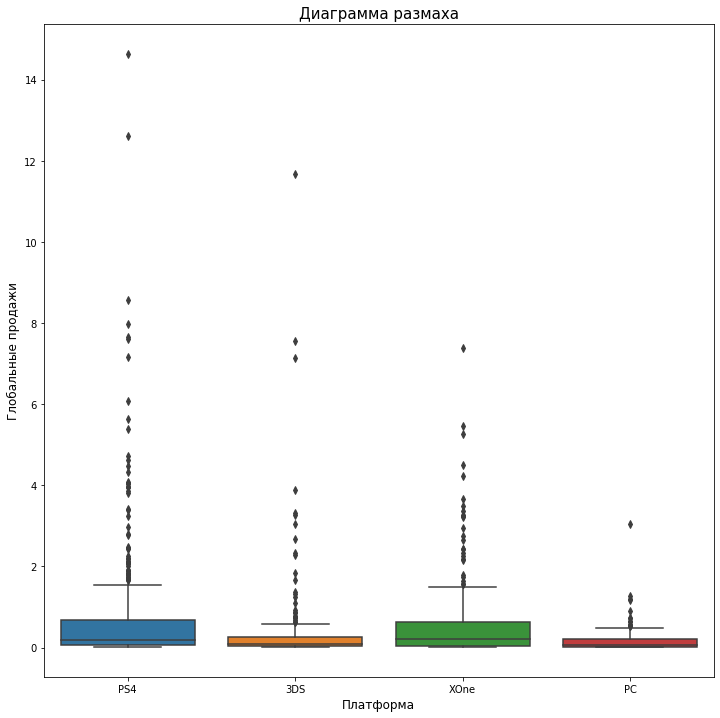

In [26]:
plt.figure(figsize=(12,12))
sns.boxplot(data = games_top_platforms, x='platform', y='all_sales')
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)


Можем заметить, что игры-бестселлеры - это скорее исключение из правил. Обычно продажи не превышают миллиона проданных копий. Лучше всего идут продажи на XOne и PS4.

Посмотрим, как влияют на продажи внутри PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

-0.040131589472697356


Text(0.5, 1.0, 'Диаграмма рассеяния между оценками пользователей и продажами')

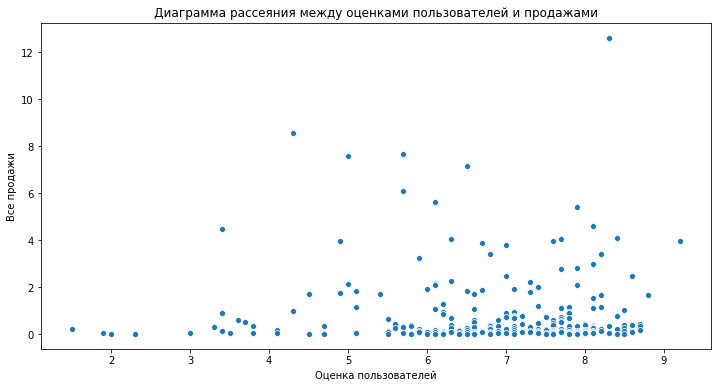

In [27]:
sony_play_station4 = actual_data[actual_data['platform'] == 'PS4']
print(sony_play_station4['user_score'].corr(sony_play_station4['all_sales']))
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'user_score', y = 'all_sales', data = sony_play_station4)
plt.xlabel('Оценка пользователей')
plt.ylabel('Все продажи')
plt.title('Диаграмма рассеяния между оценками пользователей и продажами')

0.40266141068104083


Text(0.5, 1.0, 'Диаграмма рассеяния между оценками критиков и продажами')

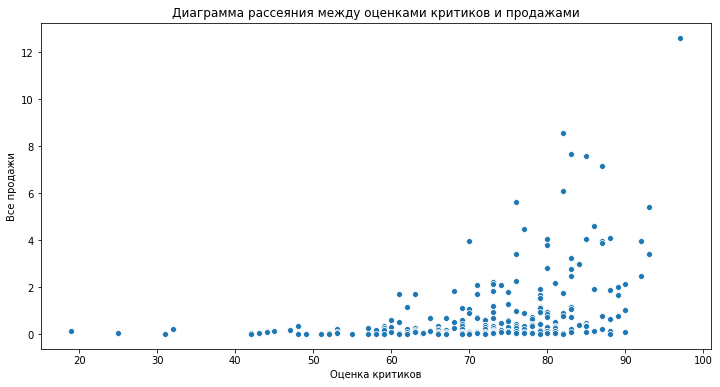

In [28]:
print(sony_play_station4['critic_score'].corr(sony_play_station4['all_sales']))
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'critic_score', y = 'all_sales', data = sony_play_station4)
plt.xlabel('Оценка критиков')
plt.ylabel('Все продажи')
plt.title('Диаграмма рассеяния между оценками критиков и продажами')

Особой связи между оценками пользователей и продажами не наблюдается. А вот от оценок критиков продажи зависят значительно больше. Посмотрим, как это соотносится с другими платформами.

In [29]:
def correlation(platform_name):
    platform = actual_data[actual_data['platform'] == platform_name]
    print('Коэффициент корреляции между отзывами пользователей и продажами =', platform['user_score'].corr(platform['all_sales']))
    plt.figure(figsize = (12,6))
    sns.scatterplot(x = 'user_score', y = 'all_sales', data = platform)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Все продажи')
    plt.title('Диаграмма рассеяния между отзывами и продажами')
    plt.show()
    
    print('Коэффициент корреляции между оценками критиков и продажами =', platform['critic_score'].corr(platform['all_sales']))
    plt.figure(figsize = (12,6))
    sns.scatterplot(x = 'critic_score', y = 'all_sales', data = platform)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Все продажи')
    plt.title('Диаграмма рассеяния между оценками критиков и продажами')
    plt.show()

Коэффициент корреляции между отзывами пользователей и продажами = -0.0703839280647581


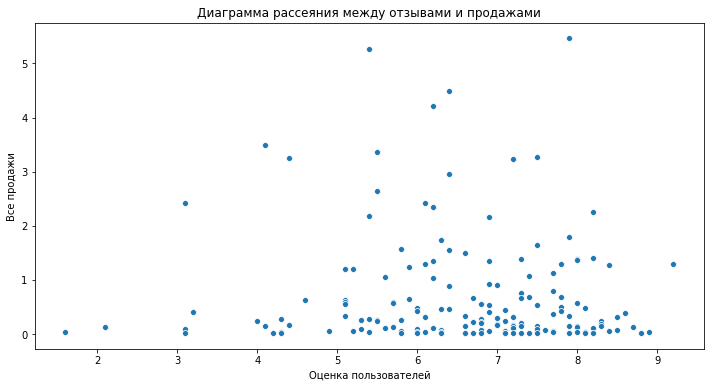

Коэффициент корреляции между оценками критиков и продажами = 0.42867694370333226


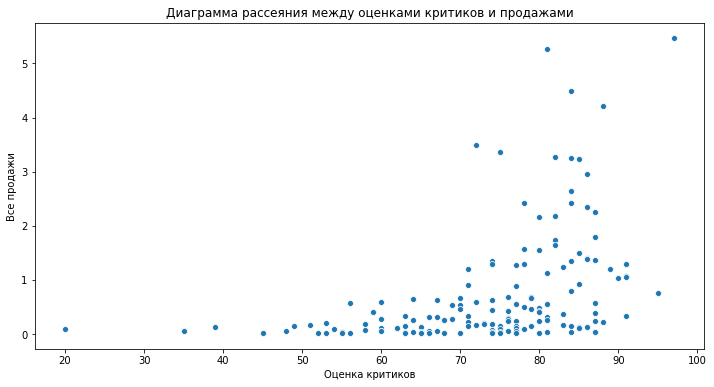

In [30]:
correlation('XOne')

Коэффициент корреляции между отзывами пользователей и продажами = -0.07159665703472451


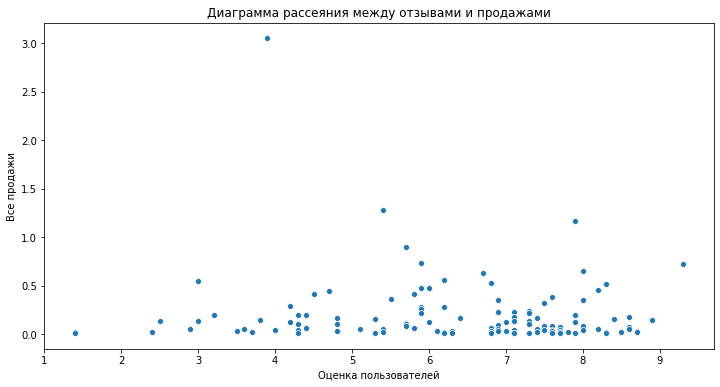

Коэффициент корреляции между оценками критиков и продажами = 0.17463413769350036


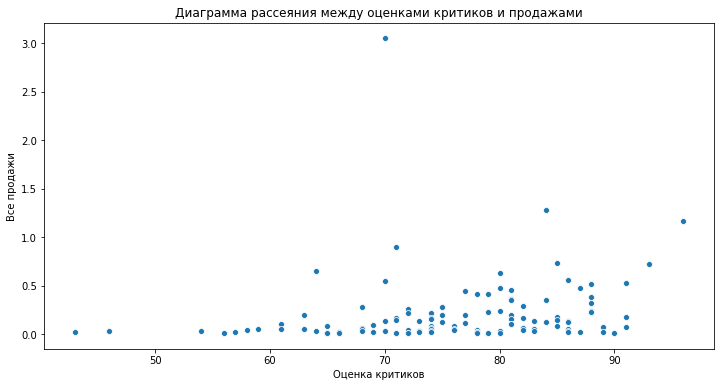

In [31]:
correlation('PC')

Коэффициент корреляции между отзывами пользователей и продажами = 0.2151932718527028


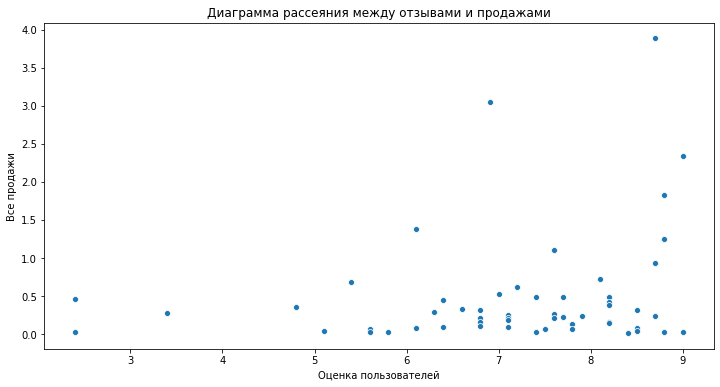

Коэффициент корреляции между оценками критиков и продажами = 0.314117492869051


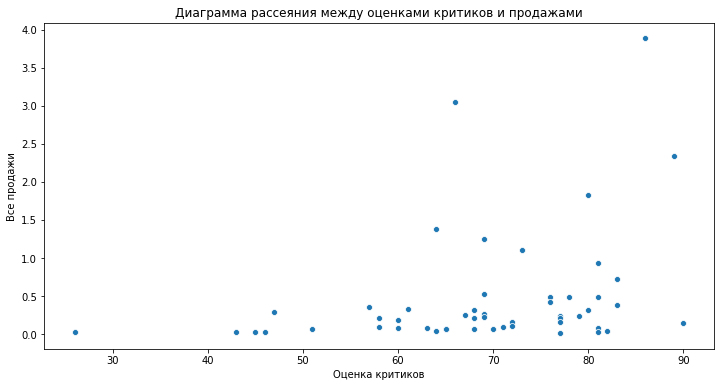

In [32]:
correlation('3DS')

Для XOne картина похожа на PS4. Для PC оценки критиков имеют чуть меньшее значение. А вот для 3DS оценки пользователей и критиков имеют схожее влияние на продажи.

Посмотрим на распределение игр по жанрам.

In [33]:
distr_genre = games_top_platforms.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre


,genre,all_sales
0,Action,150.08
1,Shooter,139.64
2,Role-Playing,84.43
3,Sports,75.94
4,Misc,18.41
5,Fighting,18.10
6,Racing,17.69
7,Simulation,12.28
8,Adventure,10.98
9,Platform,10.08


Text(0, 0.5, 'Продажи')

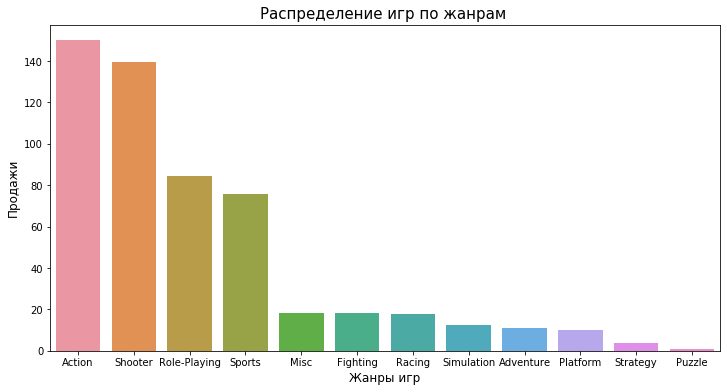

In [34]:
plt.figure(figsize = (12,6))
plt.title('Распределение игр по жанрам ',fontsize = 15)
sns.barplot(data = distr_genre, x ='genre', y ='all_sales')
plt.xlabel('Жанры игр',fontsize = 12)
plt.ylabel('Продажи',fontsize = 12)

На диаграмме явно выделяются жанры экшн и шутер как самые популярные и жанры стратегии и головоломки как наименее популярные.

## Портрет пользователя для каждого региона <a id="portrait"></a>

Посмотрим, как влияет региональная принадлежность пользователя на распределение жанров по популярности.

In [35]:
actual_data.sample(30)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
12194,Sherlock Holmes: Crimes & Punishments,PS3,2014,Adventure,0.03,0.03,0.00,0.01,NaN,NaN,Unknown,0.07
11021,Yaiba: Ninja Gaiden Z,PS3,2014,Action,0.05,0.03,0.00,0.02,43.0,4.5,M,0.10
7631,Sleeping Dogs,XOne,2014,Action,0.10,0.09,0.00,0.02,NaN,NaN,Unknown,0.21
8942,Lego Star Wars: The Force Awakens,WiiU,2016,Action,0.06,0.07,0.01,0.01,74.0,8.0,E10+,0.15
14080,Homefront: The Revolution,PC,2016,Shooter,0.01,0.02,0.00,0.00,54.0,3.5,M,0.03
12574,Doraemon: Nobita no Uchuu Eiyuuki,3DS,2015,Action,0.00,0.00,0.06,0.00,NaN,NaN,Unknown,0.06
9098,Skylanders Imaginators,PS4,2016,Platform,0.04,0.08,0.00,0.02,80.0,5.5,E10+,0.14
1910,Plants vs. Zombies: Garden Warfare,X360,2014,Shooter,0.51,0.47,0.00,0.09,69.0,7.3,E10+,1.07
11680,Samurai Warriors Chronicles 3,3DS,2014,Action,0.00,0.00,0.08,0.00,63.0,6.1,T,0.08
7577,The Heavy Rain and Beyond: Two Souls Collection,PS4,2016,Action,0.00,0.17,0.00,0.03,NaN,NaN,Unknown,0.20


In [50]:
region = ['na_sales', 'eu_sales', 'jp_sales']
def graphic_region(region):
    for i in region:
        
        
        platform_sales = actual_data.pivot_table(
            index = 'platform', 
            values = i, 
            aggfunc = 'sum').sort_values(by = i, ascending = False)
        
        plt.figure(figsize=(13,6))
        sns.barplot(x=platform_sales.index, y=platform_sales[i])
        plt.title("Продажи по региону за актуальный период")
        plt.xlabel("Название платформы")
        plt.ylabel("Количество продаж")
        
        genre_sales = actual_data.pivot_table(
            index = 'genre', 
            values = i, 
            aggfunc = 'sum').sort_values(by = i, ascending = False)
        
        plt.figure(figsize=(13,6))
        sns.barplot(x=genre_sales.index, y=genre_sales[i])

        plt.title("Продажи по жанрам за актуальный период")
        plt.xlabel("Название жанра")
        plt.ylabel("Количество продаж")
        
        
        rating_sales = actual_data.pivot_table(
            index = 'rating', 
            values = i, 
            aggfunc = 'sum').sort_values(by = i, ascending = False)
        
        plt.figure(figsize=(13,6))
        sns.barplot(x=rating_sales.index, y=rating_sales[i])

        plt.title("Продажи по рейтингу за актуальный период")
        plt.xlabel("Рейтинг")
        plt.ylabel("Количество продаж")

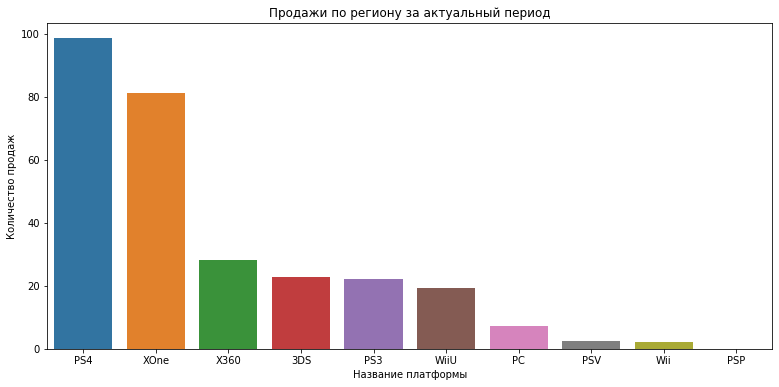

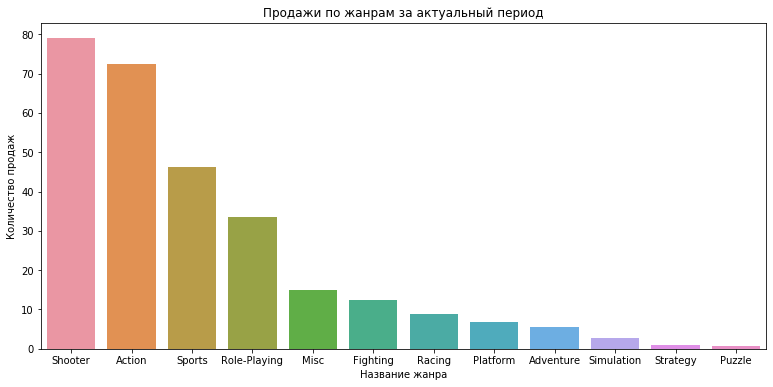

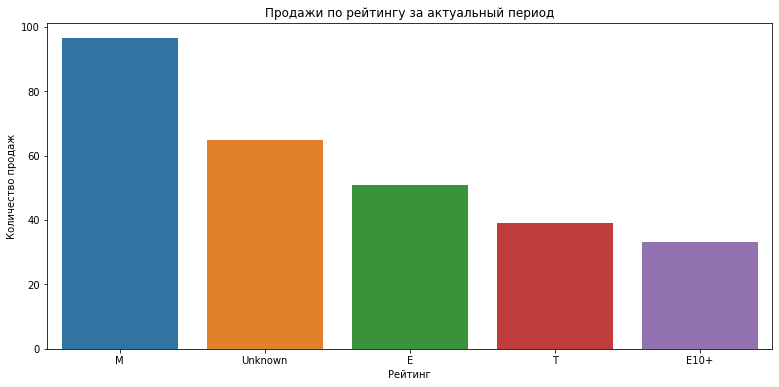

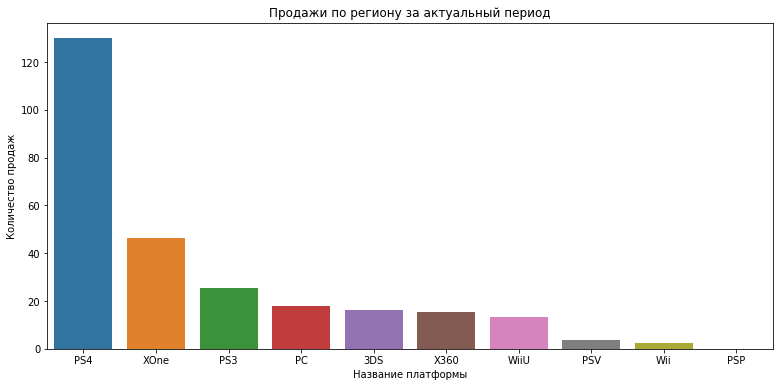

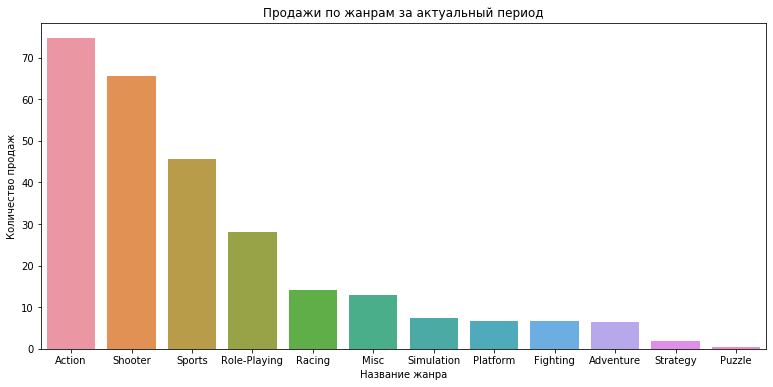

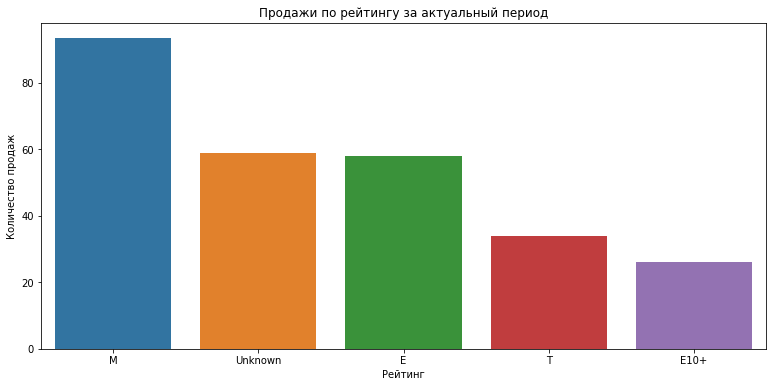

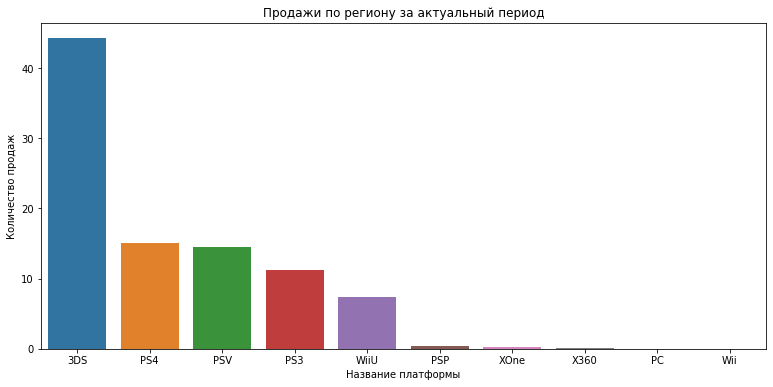

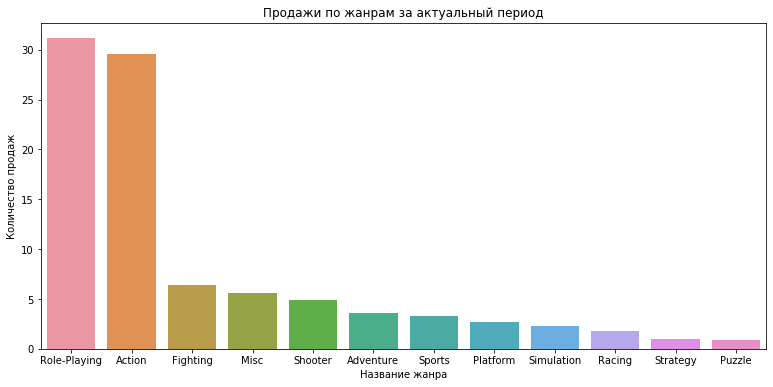

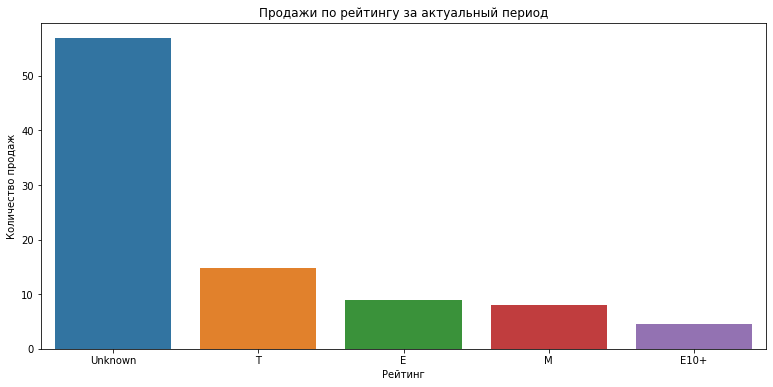

In [51]:
graphic_region(region)

Text(0, 0.5, 'Количество продаж')

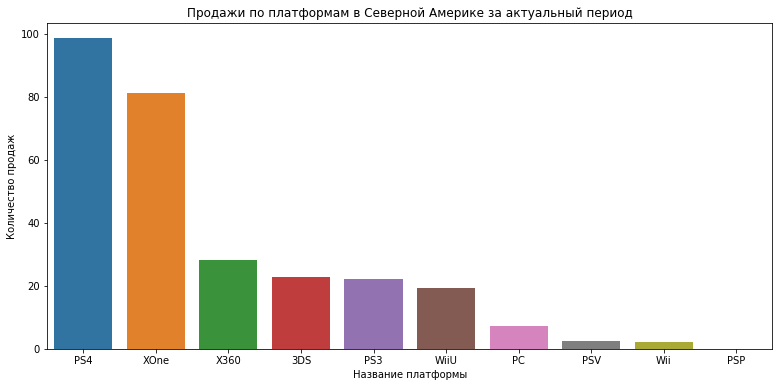

In [36]:
platform_sales_na = actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales_na.index, y=platform_sales_na['na_sales'])

plt.title("Продажи по платформам в Северной Америке за актуальный период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

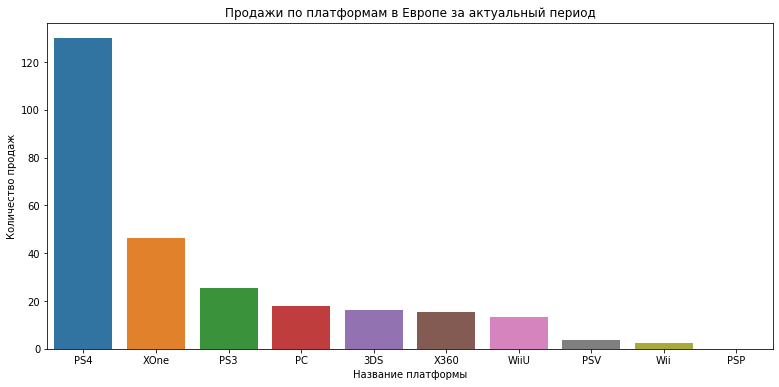

In [37]:
platform_sales_eu = actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales_eu.index, y=platform_sales_eu['eu_sales'])

plt.title("Продажи по платформам в Европе за актуальный период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

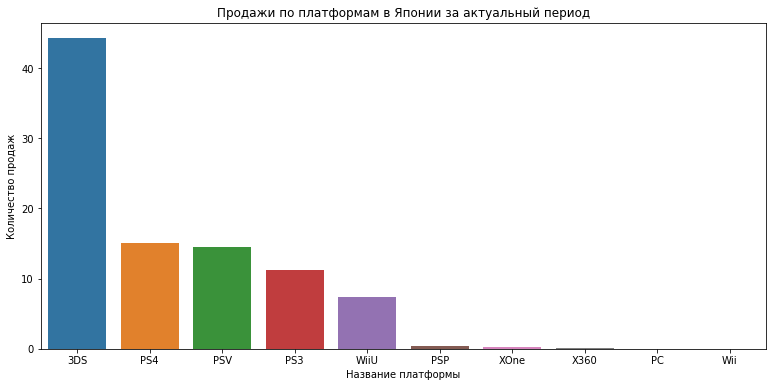

In [38]:
platform_sales_jp = actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales_jp.index, y=platform_sales_jp['jp_sales'])

plt.title("Продажи по платформам в Японии за актуальный период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

В Северной Америке самые популярные консоли с отрывом PS4 и X360. В Европе лидерство PS4 еще больше. А вот в Японии самая популярная консоль - 3DS, видимо за счет продаж в Японии она и держится до сих пор так высоко, несмотря на то, что срок жизни этой консоли подходит к концу. А вот XOne продается очень плохо: японцы любят только национальную продукцию.

Text(0, 0.5, 'Количество продаж')

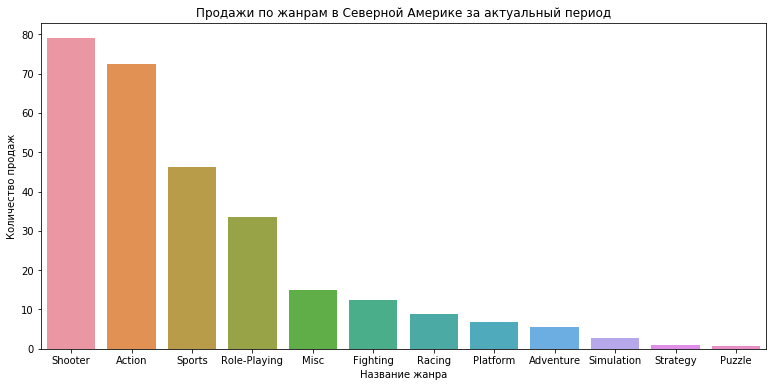

In [39]:
genre_sales_na = actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(x=genre_sales_na.index, y=genre_sales_na['na_sales'])

plt.title("Продажи по жанрам в Северной Америке за актуальный период")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

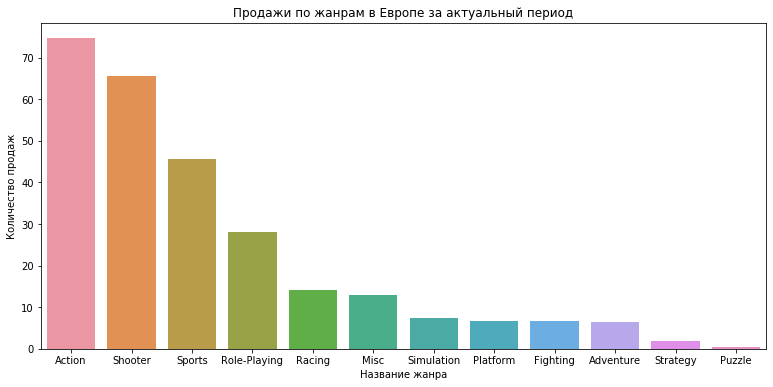

In [40]:
genre_sales_eu = actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(x=genre_sales_eu.index, y=genre_sales_eu['eu_sales'])

plt.title("Продажи по жанрам в Европе за актуальный период")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

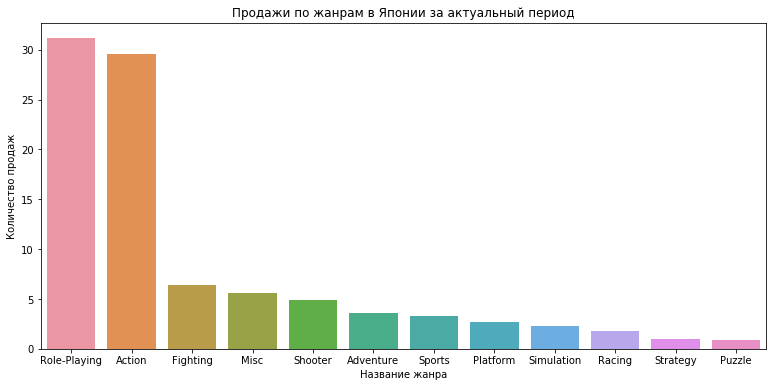

In [41]:
genre_sales_jp = actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(x=genre_sales_jp.index, y=genre_sales_jp['jp_sales'])

plt.title("Продажи по жанрам в Японии за актуальный период")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")

В Европе и Северной Америке самыми популярными жанрами являются экшн и шутеры. В Японии экшн тоже популярен, но даже он уступает жанру Role-Playing.

Text(0, 0.5, 'Количество продаж')

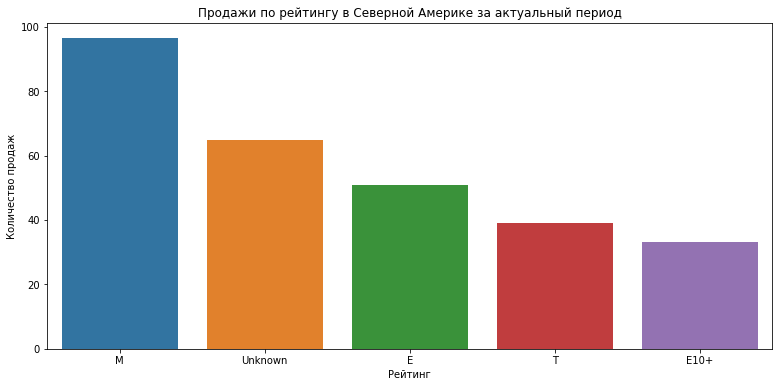

In [42]:
rating_sales_na = actual_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(x=rating_sales_na.index, y=rating_sales_na['na_sales'])

plt.title("Продажи по рейтингу в Северной Америке за актуальный период")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

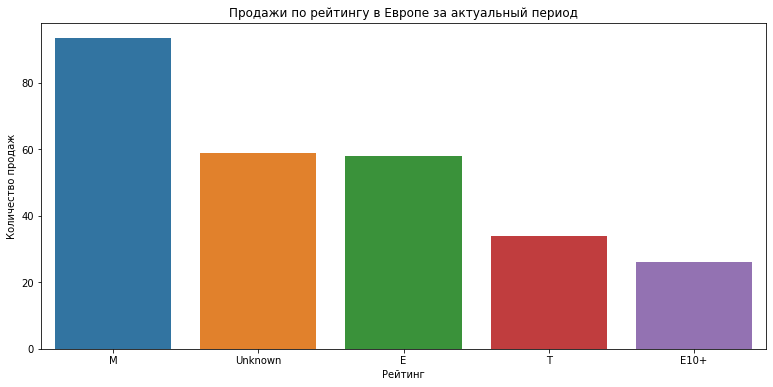

In [43]:
rating_sales_eu = actual_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(x=rating_sales_eu.index, y=rating_sales_eu['eu_sales'])

plt.title("Продажи по рейтингу в Европе за актуальный период")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

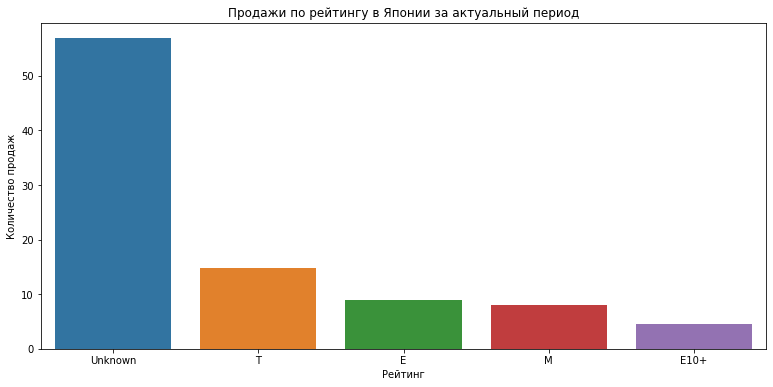

In [44]:
rating_sales_jp = actual_data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)
plt.figure(figsize=(13,6))
sns.barplot(x=rating_sales_jp.index, y=rating_sales_jp['jp_sales'])

plt.title("Продажи по рейтингу в Японии за актуальный период")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")

В Европе и Северной Америке больше всего продается игр для взрослой аудитории, а в Японии - для подростков. Видимо, в Японии более строгие законы, в плане продажи игр несовершеннолетним. Либо игры с рейтингом Т просто более популярны.

## Проверка гипотез <a id="hypothesis"></a>

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются


In [45]:
xbox_rating = actual_data[actual_data['platform'] == 'XOne']['user_score']
PC_rating = actual_data[actual_data['platform'] == 'PC']['user_score']
alpha = .01

results = st.ttest_ind(
    xbox_rating.dropna(), 
    PC_rating.dropna(),
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Можем сделать вывод, что в целом среднепользовательские рейтинги для XOne и PC совпадают.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза H₀: Рейтинги жанров одинаковые;

Альтернативная H₁: рейтинги жанров разные.

In [46]:
action_rating = actual_data[actual_data['genre'] == 'Action']['user_score']
sports_rating = actual_data[actual_data['genre'] == 'Sports']['user_score']
alpha = .01

results = st.ttest_ind(
    action_rating.dropna(), 
    sports_rating.dropna(),
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Действительно, среднепользовательский рейтинг жанров Sports и Action различается.

## Общий вывод <a id="conclusion"></a>

По итогам анализа предоставленного датасета можно сделать следующие выводы:
1. Самыми перспективными во всем мире игровыми платформами являются XOne и PS4. Они не только популярны во всем мире, но также находятся в начале своей жизни, что означает, что продажи игр для этих консолей будут в ближайшие годы только расти.

2. Для прогноза на 2017 год нужно также обратить внимание на оценки критиков: чем выше оценка, тем лучше продажи.

3. Самыми прибыльными жанрами во всем мире являются Action и Shooter, но в разных странах может быть разная ситуация, например в Японии.

4. Среднепользовательские рейтинги для XOne и PC совпадают, а вот рейтинги жанров Sports и Action - различаются.

Можно также заметить, что продажи игр для консолей прошлого поколения подчинялись закону нормального распределения. Скорее всего для новых консолей ситуация похожа. Это стоит учитывать при прогнозе продаж на 2017 год.